In [1]:
#Importing libraries
import pandas as pd
import numpy as np

In [2]:
#importing the dataframe
df = pd.read_csv('Data/train.csv')

In [3]:
#viewing the 1st rows
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#exploring the datafile data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
#check for all numeric columns
#df.select_dtypes(include=['float64'])
numerics = ['int64', 'float64']

newdf = df.select_dtypes(include=numerics)

In [6]:
newdf

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [7]:
#check for missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Filling in missing values
df["Gender"]= df["Gender"].fillna(df["Gender"].mode()[0])

In [9]:
#confirming if column has been filled
df["Gender"].isna().sum()

0

In [10]:
df["Married"]= df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]= df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]= df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["LoanAmount"]= df["LoanAmount"].fillna(df["LoanAmount"].mode()[0])
df["Loan_Amount_Term"]= df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"]= df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [11]:
#confirming if there are missing values
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
#drop Loan_ID
df = df.drop(['Loan_ID'], axis=1)

In [13]:
#confirming the column has been dropped
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
#Confirming categorical values
df["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [16]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [18]:
df["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
#Convert categorical values to numeric
cols = ("Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status")

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for c in cols:
    le = LabelEncoder()
    le.fit(list(df[c].values))
    df[c] = le.transform(list(df[c].values))

In [22]:
#explore the coulmns
df["Self_Employed"].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [23]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [24]:
#check distribution of data
import seaborn as sns

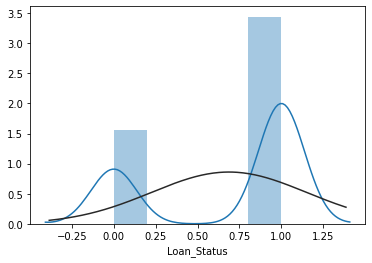

In [25]:
from scipy.stats import norm
sns.distplot(df.Loan_Status, fit =norm);

In [26]:
#check skewness and kurtosis
print(df['Loan_Status'].skew())
print(df['Loan_Status'].kurt())

-0.8099980938586473
-1.3483056138035947


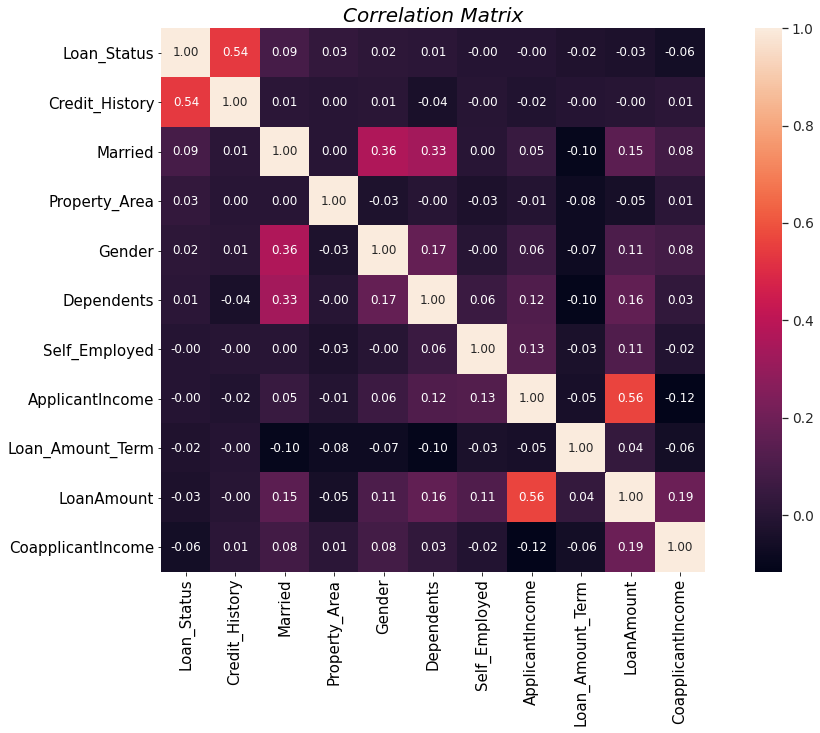

In [27]:
#Plotting
#correlation matrix
import matplotlib.pyplot as plt
corrmat = df.corr()
cols = corrmat.nlargest(11, 'Loan_Status')['Loan_Status'].index #specify number of columns to display i.e 21
f, ax = plt.subplots(figsize=(18, 10)) #size of matrix
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values,
                 xticklabels=cols.values)

plt.yticks(rotation=0, size=15)
plt.xticks(rotation=90, size=15)
plt.title("Correlation Matrix",style='oblique', size= 20)
plt.show()

In [28]:
#Defining X
X = df.loc[:,df.columns != 'Loan_Status']

In [29]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [30]:
#Define y
y = df["Loan_Status"]

In [31]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [32]:
#Split the dataframe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

In [33]:
X_train.shape

(491, 11)

In [34]:
X_test.shape

(123, 11)

In [35]:
y_train.shape

(491,)

In [39]:
#scaling x train xtest y train and y test
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train.values)

X_train_minmax
X_train_minmax = min_max_scaler.fit_transform(X_train.values)
X_train_minmax

array([[1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        0.5       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.48717949, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ]])

In [40]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_test_minmax = min_max_scaler.fit_transform(X_test.values)

X_test_minmax
X_test_minmax = min_max_scaler.fit_transform(X_test.values)
X_test_minmax

array([[1.        , 1.        , 0.        , ..., 0.6969697 , 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.6969697 , 1.        ,
        0.5       ],
       [1.        , 1.        , 0.66666667, ..., 0.6969697 , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 1.        , 1.        ,
        0.5       ],
       [1.        , 1.        , 0.66666667, ..., 0.6969697 , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 0.24242424, 1.        ,
        1.        ]])

In [42]:
#Fit model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train_minmax, y_train)
reg.score(X_test_minmax, y_test)

0.7886178861788617